<a href="https://colab.research.google.com/github/SumathiGit/Defect-Detection-Food-Package/blob/main/Def_Detection_Food_Package_100Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img_zip_path = '/content/drive/My Drive/Defect_Detection_Dataset/Img/Defect_Detection_Img.zip'

In [4]:
import os
import zipfile
import pandas as pd
import numpy as np
from PIL import Image

In [5]:
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall("Files")
zip_ref.close()

In [6]:
df = pd.read_csv("/content/drive/My Drive/Defect_Detection_Dataset/Anno/food.csv")

In [7]:
df.head()

,filename,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bottle,Label1_Bread,Label1_CAKE,Label1_CORN,Label1_Candy,Label1_Cans,Label1_Cashews,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label1_Cocktail,Label1_CoolDrinks,Label1_Dates,Label1_DriedMango,Label1_Drinks,Label1_Fish,Label1_Flakes,Label1_Flour,Label1_FoodPack,Label1_Honey,Label1_JAM,Label1_Meat,Label1_MilkDrink,Label1_Muffins,Label1_Mushroom,Label1_NUTS,Label1_Noodles,Label1_PackedFood,Label1_Paprika,Label1_Pasta,Label1_Peanuts,Label1_Pistachios,Label1_RICE,Label1_SODA,Label1_SUGAR,...,Label2_OilDefected,Label2_OilPerfect,Label2_PackedFoodDefected,Label2_PackedFoodPerfect,Label2_Paprika Defected,Label2_PaprikaPerfect,Label2_PastaDefected,Label2_PastaPerfect,Label2_PeanutsDefected,Label2_PeanutsPerfect,Label2_PistachiosDefected,Label2_PistachiosPerfect,Label2_RiceDefected,Label2_RicePerfect,Label2_SaltDefected,Label2_SaltPerfect,Label2_SauceDefected,Label2_SaucePerfect,Label2_SeedsDefected,Label2_SeedsPerfect,Label2_SnackDefected,Label2_SnackPerfect,Label2_SodaDefected,Label2_SodaPerfect,Label2_SoySauceDefected,Label2_SoySaucePerfect,Label2_SpicesDefected,Label2_SpicesPerfect,Label2_SugarDefected,Label2_SugarPerfect,Label2_TeaBagsDefected,Label2_TeaBagsPerfect,Label2_ToothPastePerfect,Label2_ToothpasteDefected,Label2_VinegarDefected,Label2_VinegarPerfect,Label2_WaferDefected,Label2_WaferPerfect,Defected,Non_Defected
0,6930096350922_camera0-1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,6930096350922_camera3-11.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6921168593736_camera1-7.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,6921168593736_camera0-32.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6930096350922_camera0-23.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [8]:
df = df.set_index("filename", drop = True)

In [9]:
df.head()

,Label1_Beans,Label1_Beverage,Label1_Biscuits,Label1_Bottle,Label1_Bread,Label1_CAKE,Label1_CORN,Label1_Candy,Label1_Cans,Label1_Cashews,Label1_Cereal,Label1_Chips,Label1_ChipsPack,Label1_Chocolate,Label1_Cocktail,Label1_CoolDrinks,Label1_Dates,Label1_DriedMango,Label1_Drinks,Label1_Fish,Label1_Flakes,Label1_Flour,Label1_FoodPack,Label1_Honey,Label1_JAM,Label1_Meat,Label1_MilkDrink,Label1_Muffins,Label1_Mushroom,Label1_NUTS,Label1_Noodles,Label1_PackedFood,Label1_Paprika,Label1_Pasta,Label1_Peanuts,Label1_Pistachios,Label1_RICE,Label1_SODA,Label1_SUGAR,Label1_Salt,...,Label2_OilDefected,Label2_OilPerfect,Label2_PackedFoodDefected,Label2_PackedFoodPerfect,Label2_Paprika Defected,Label2_PaprikaPerfect,Label2_PastaDefected,Label2_PastaPerfect,Label2_PeanutsDefected,Label2_PeanutsPerfect,Label2_PistachiosDefected,Label2_PistachiosPerfect,Label2_RiceDefected,Label2_RicePerfect,Label2_SaltDefected,Label2_SaltPerfect,Label2_SauceDefected,Label2_SaucePerfect,Label2_SeedsDefected,Label2_SeedsPerfect,Label2_SnackDefected,Label2_SnackPerfect,Label2_SodaDefected,Label2_SodaPerfect,Label2_SoySauceDefected,Label2_SoySaucePerfect,Label2_SpicesDefected,Label2_SpicesPerfect,Label2_SugarDefected,Label2_SugarPerfect,Label2_TeaBagsDefected,Label2_TeaBagsPerfect,Label2_ToothPastePerfect,Label2_ToothpasteDefected,Label2_VinegarDefected,Label2_VinegarPerfect,Label2_WaferDefected,Label2_WaferPerfect,Defected,Non_Defected
filename,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6930096350922_camera0-1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6930096350922_camera3-11.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6921168593736_camera1-7.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6921168593736_camera0-32.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6930096350922_camera0-23.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
df.index

Index(['6930096350922_camera0-1.jpg', '6930096350922_camera3-11.jpg',
       '6921168593736_camera1-7.jpg', '6921168593736_camera0-32.jpg',
       '6930096350922_camera0-23.jpg', '6921168593736_camera3-31.jpg',
       '6921168593736_camera0-17.jpg', '6921168593736_camera1-33.jpg',
       '6921168593736_camera1-32.jpg', '6930096350922_camera2-40.jpg',
       ...
       'CEREAL0249.jpg', 'CEREAL0023.jpg', 'CEREAL0225.jpg', 'CEREAL0257.jpg',
       'CEREAL0274.jpg', 'CEREAL0010.jpg', 'CEREAL0098.jpg', 'CEREAL0224.jpg',
       'CEREAL0013.jpg', 'CEREAL0254.jpg'],
      dtype='object', name='filename', length=7624)

In [11]:
from glob import glob

In [ ]:
Image.open('Files/Beans/BeansDefected/6926892501033_camera1-8.jpg').convert("RGB")

In [13]:
files = glob('Files/**/*.jpg', recursive=True)

In [ ]:
print(files)

In [15]:
len(files)

7624

In [16]:
np.random.seed(0) 

In [17]:
shuffle = np.random.permutation(len(files))

In [18]:
len(shuffle)

7624

In [19]:
len(shuffle)*0.3

2287.2

In [20]:
max(shuffle)

7623

In [21]:
for i in ['train', 'valid']:
    try:

      os.mkdir(os.path.join('/tmp/', i))
    except:
        pass

In [22]:
!ls /tmp/

dap_multiplexer.a579e50879c5.root.log.INFO.20210715-040801.51
dap_multiplexer.INFO
debugger_yiccs4d8s
drivefs_ipc.0
drivefs_ipc.0_shell
initgoogle_syslog_dir.0
tmpby5ol6m9
train
valid


In [23]:
files[10].split('/')[-1]

'6940737300148_camera2-30.jpg'

In [24]:
((np.array(df[df.index==files[10].split('/')[-1]]))).shape

(2, 152)

In [25]:
from tqdm import tqdm

In [26]:
print(type(shuffle))

<class 'numpy.ndarray'>


In [27]:
#!rm -Rf /tmp/valid/

In [28]:
#!mkdir /tmp/valid

In [29]:
!ls -ltr /tmp/

total 24
lrwxrwxrwx 1 root root   61 Jul 15 04:08 dap_multiplexer.INFO -> dap_multiplexer.a579e50879c5.root.log.INFO.20210715-040801.51
srwxr-xr-x 1 root root    0 Jul 15 04:08 debugger_yiccs4d8s
drwx------ 2 root root 4096 Jul 15 04:08 initgoogle_syslog_dir.0
-rw-r--r-- 1 root root 1433 Jul 15 04:08 dap_multiplexer.a579e50879c5.root.log.INFO.20210715-040801.51
drwx------ 2 root root 4096 Jul 15 04:10 tmpby5ol6m9
srw------- 1 root root    0 Jul 15 04:10 drivefs_ipc.0
srw------- 1 root root    0 Jul 15 04:10 drivefs_ipc.0_shell
drwxr-xr-x 2 root root 4096 Jul 15 04:11 valid
drwxr-xr-x 2 root root 4096 Jul 15 04:11 train


In [30]:
import time

In [ ]:
valid_dict = {}
valid_file_names = []
#count = 0
for i in tqdm(shuffle[:2287]):
    file_name = files[i].split('/')[-1]
    print(file_name)
    labels = np.array(df[df.index==file_name])
    valid_dict[file_name] = labels
    valid_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/valid', file_name))
    #time.sleep(10)
    #count = count + 1
    #print(count)
    #print("******************************************")

In [ ]:
print(valid_file_names)
print(len(valid_file_names))

In [ ]:
filename_1 = valid_file_names
print("List Before ", filename_1)
temp_list = []

for i in filename_1:
    if i not in temp_list:
        temp_list.append(i)

filename_1 = temp_list

print("List After removing duplicates ", filename_1)
len(filename_1)

In [34]:
#!ls -ltr /tmp/valid

In [35]:
# import os, fnmatch
# filename1 = fnmatch.filter(os.listdir('/tmp/valid/'), '*.jpg')
# print(filename1)
# print(len(filename1))

In [36]:
# from collections import Counter
# a = valid_file_names
# b = filename1

# c1 = Counter(a)
# c2 = Counter(b)
# diff = list((Counter(a) - Counter(b)).elements())
# print(diff)
# print(len(diff))

In [37]:
# l1 = valid_file_names
# l2=diff
# diff_list1_list2 = list(set(l1) - set(l2))
# diff_list2_list1 = list(set(l2) - set(l1))
# ttl_diff = diff_list1_list2 + diff_list2_list1
# print(ttl_diff)
# print(len(ttl_diff))

In [38]:
print(file_name)

6902227014843_camera0-35.jpg


In [ ]:
print(glob('/tmp/valid/*.jpg'))

In [40]:
print(type('/tmp/valid/*.jpg'))

<class 'str'>


In [41]:
len(glob('/tmp/valid/*.jpg'))

2162

In [ ]:
valid_df = pd.DataFrame(valid_dict.values())

In [43]:
valid_df

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...
2157,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2159,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2160,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [44]:
len(valid_df.columns)

1

In [45]:
valid_df.index = filename_1

In [46]:
valid_df.head()

,0
6907777821903_camera2-12.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6940188803618_camera0-24.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
6907777822948_camera2-12.jpg,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
PASTA0125.jpg,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
CAKE0036.jpg,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [47]:
valid_df.columns = ['labels']

In [48]:
print(labels)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 1 0]]


In [49]:
train_dict = {}
train_file_names = []
for i in tqdm(shuffle[2300:]):
    file_name = files[i].split('/')[-1]
    labels = np.array(df[df.index==file_name])
    train_dict[file_name] = labels
    train_file_names.append(file_name)
    os.rename(files[i], os.path.join('/tmp/', '/tmp/train', file_name))

100%|██████████| 5324/5324 [00:03<00:00, 1361.34it/s]


In [ ]:
print(train_file_names)
print(len(train_file_names))

In [ ]:
filename_2 = train_file_names
print("List Before ", filename_2)
temp_list = []

for i in filename_2:
    if i not in temp_list:
        temp_list.append(i)

filename_2 = temp_list

print("List After removing duplicates ", filename_2)
len(filename_2)

In [52]:
len(train_dict)

4672

In [53]:
train_df = pd.DataFrame(train_dict.values())

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [54]:
train_df.head()

,0
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [55]:
train_df.columns

RangeIndex(start=0, stop=1, step=1)

In [56]:
train_df.index.values

array([   0,    1,    2, ..., 4669, 4670, 4671])

In [57]:
train_df.index = filename_2

In [58]:
train_df.columns = ['labels']

In [59]:
"""Generating Batches and Training """

'Generating Batches and Training '

In [60]:
import torchvision
from glob import glob
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision import models
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid
import time
%matplotlib inline

In [61]:
from torch.utils.data import Dataset

In [62]:
class MultiClassFoodPackage(Dataset):
    
    def __init__(self, dataframe, folder_dir, transform = None):
        
        self.dataframe = dataframe
        self.folder_dir = folder_dir
        self.transform = transform
        self.file_names = dataframe.index
        self.labels = dataframe.labels.values.tolist()
        
        
    def __len__(self):
        return len(self.dataframe)
    
    
    def __getitem__(self, index):
        
        image = Image.open(os.path.join(self.folder_dir, self.file_names[index]))
        label = self.labels[index][0]
        sample = {'image': image, 'label': label.astype(float)}
        if self.transform:
            image = self.transform(sample['image'])
            sample = {'image': image, 'label': label.astype(float)}
        
        return sample

In [63]:
tfms = transforms.Compose([transforms.Resize((256, 256)),
                           transforms.ToTensor()])

In [64]:
train_dl = MultiClassFoodPackage(train_df, '/tmp/train/', transform = tfms)

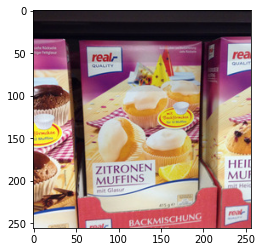

In [65]:
plt.imshow(torchvision.utils.make_grid(train_dl[1]['image']).permute(1, 2, 0))

In [66]:
(train_dl[1]['label'].astype(float))

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [67]:
df.columns

Index(['Label1_Beans', 'Label1_Beverage', 'Label1_Biscuits', 'Label1_Bottle',
       'Label1_Bread', 'Label1_CAKE', 'Label1_CORN', 'Label1_Candy',
       'Label1_Cans', 'Label1_Cashews',
       ...
       'Label2_TeaBagsDefected', 'Label2_TeaBagsPerfect',
       'Label2_ToothPastePerfect', 'Label2_ToothpasteDefected',
       'Label2_VinegarDefected', 'Label2_VinegarPerfect',
       'Label2_WaferDefected', 'Label2_WaferPerfect', 'Defected',
       'Non_Defected'],
      dtype='object', length=152)

In [68]:
valid_dl = MultiClassFoodPackage(valid_df, '/tmp/valid/', transform = tfms)

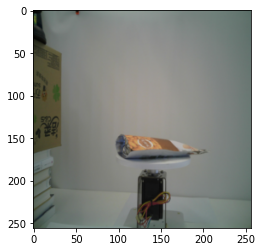

In [69]:
plt.imshow(torchvision.utils.make_grid(valid_dl[1]['image']).permute(1,2,0))

In [70]:
valid_dl[1]['label']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [71]:
import torch.nn.functional as F

In [72]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(3, 64, 3), # 3, 256, 256
            nn.MaxPool2d(2), # op: 16, 127, 127
            nn.ReLU(), # op: 64, 127, 127
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # 64, 127, 127   
            nn.MaxPool2d(2), #op: 128, 63, 63
            nn.ReLU() # op: 128, 63, 63
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3), # 128, 63, 63
            nn.MaxPool2d(2), #op: 256, 30, 30
            nn.ReLU() #op: 256, 30, 30
        )
        self.ConvLayer4 = nn.Sequential(
            nn.Conv2d(256, 512, 3), # 256, 30, 30
            nn.MaxPool2d(2), #op: 512, 14, 14
            nn.ReLU(), #op: 512, 14, 14
            nn.Dropout(0.2)
        )
        self.Linear1 = nn.Linear(512 * 14 * 14, 1024)
        self.Linear2 = nn.Linear(1024, 256)
        self.Linear3 = nn.Linear(256, 152)
        
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)
        x = self.ConvLayer4(x)
        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        x = self.Linear3(x)
        return F.sigmoid(x)

In [73]:
def check_cuda():
    _cuda = False
    if torch.cuda.is_available():
        _cuda = True
    return _cuda

In [74]:
is_cuda = check_cuda()

In [75]:
model = MultiClassifier()
if is_cuda:
    model.cuda()

In [76]:
train_dataloader = torch.utils.data.DataLoader(train_dl, shuffle = True, batch_size = 64, num_workers = 2)
valid_dataloader = torch.utils.data.DataLoader(valid_dl, shuffle = True, batch_size = 64, num_workers = 2)

In [77]:
"""Evaluating our model based on how many correct labels our model in able to predict 
and summing the number of correct label predictions for every image to and 
then dividing it by the number of labels.""" 

'Evaluating our model based on how many correct labels our model in able to predict \nand summing the number of correct label predictions for every image to and \nthen dividing it by the number of labels.'

In [78]:
def pred_acc(original, predicted):
    return torch.round(predicted).eq(original).sum().numpy()/len(original)

In [79]:
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)

In [80]:
from pprint import pprint

In [81]:
def fit_model(epochs, model, dataloader, phase = 'training', volatile = False):
    
    pprint("Epoch: {}".format(epochs))

    if phase == 'training':
        model.train()
        
    if phase == 'validataion':
        model.eval()
        volatile = True
        
    running_loss = []
    running_acc = []
    b = 0
    for i, data in enumerate(dataloader):
        

        inputs, target = data['image'].cuda(), data['label'].float().cuda()
        inputs, target = Variable(inputs), Variable(target)
        
        if phase == 'training':
            optimizer.zero_grad()
            
        ops = model(inputs)
        
        acc_ = []
        for i, d in enumerate(ops, 0):
           
            acc = pred_acc(torch.Tensor.cpu(target[i]), torch.Tensor.cpu(d))
            acc_.append(acc)

        loss = criterion(ops, target)
                
        running_loss.append(loss.item())
        running_acc.append(np.asarray(acc_).mean())
        b += 1
       
        if phase == 'training':
            
            loss.backward()
        
            optimizer.step()
            
    total_batch_loss = np.asarray(running_loss).mean()
    total_batch_acc = np.asarray(running_acc).mean()
    

    pprint("{} loss is {} ".format(phase,total_batch_loss))
    pprint("{} accuracy is {} ".format(phase, total_batch_acc))
    
    return total_batch_loss, total_batch_acc

In [82]:
trn_losses = []; trn_acc = []
val_losses = []; val_acc = []
for i in tqdm(range(1, 100)):
    trn_l, trn_a = fit_model(i, model, train_dataloader)
    val_l, val_a = fit_model(i, model, valid_dataloader, phase = 'validation')
    trn_losses.append(trn_l); trn_acc.append(trn_a)
    val_losses.append(val_l); val_acc.append(val_a)

  0%|          | 0/99 [00:00<?, ?it/s]

'Epoch: 1'


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


'training loss is 0.6908265915635514 '
'training accuracy is 0.5536722129596251 '
'Epoch: 1'


  1%|          | 1/99 [04:47<7:50:18, 287.94s/it]

'validation loss is 0.6879859917304095 '
'validation accuracy is 0.6011600232198142 '
'Epoch: 2'
'training loss is 0.6842700847207683 '
'training accuracy is 0.6588945340663301 '
'Epoch: 2'


  2%|▏         | 2/99 [09:38<7:46:41, 288.67s/it]

'validation loss is 0.6795280453036813 '
'validation accuracy is 0.731335744001548 '
'Epoch: 3'
'training loss is 0.6700843793072112 '
'training accuracy is 0.8160232290915646 '
'Epoch: 3'


  3%|▎         | 3/99 [14:29<7:43:10, 289.48s/it]

'validation loss is 0.6543822165797738 '
'validation accuracy is 0.8844424825851394 '
'Epoch: 4'
'training loss is 0.5825792126459618 '
'training accuracy is 0.9002892371124729 '
'Epoch: 4'


  4%|▍         | 4/99 [19:21<7:39:30, 290.21s/it]

'validation loss is 0.4002392598811318 '
'validation accuracy is 0.9232947948916407 '
'Epoch: 5'
'training loss is 0.14896905871286784 '
'training accuracy is 0.9740235783165104 '
'Epoch: 5'


  5%|▌         | 5/99 [24:14<7:35:49, 290.95s/it]

'validation loss is 0.075673720196766 '
'validation accuracy is 0.9849308243034054 '
'Epoch: 6'
'training loss is 0.07341010613392478 '
'training accuracy is 0.9851973684210525 '
'Epoch: 6'


  6%|▌         | 6/99 [29:06<7:31:34, 291.34s/it]

'validation loss is 0.07283615605796084 '
'validation accuracy is 0.984939289860681 '
'Epoch: 7'
'training loss is 0.07172630890591504 '
'training accuracy is 0.9851973684210525 '
'Epoch: 7'


  7%|▋         | 7/99 [34:00<7:28:02, 292.20s/it]

'validation loss is 0.07183772215948385 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 8'
'training loss is 0.07097531712218506 '
'training accuracy is 0.9851973684210525 '
'Epoch: 8'


  8%|▊         | 8/99 [38:57<7:25:22, 293.66s/it]

'validation loss is 0.0712982396430829 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 9'
'training loss is 0.07053053930197677 '
'training accuracy is 0.9851973684210525 '
'Epoch: 9'


  9%|▉         | 9/99 [43:46<7:18:21, 292.24s/it]

'validation loss is 0.07102122135898646 '
'validation accuracy is 0.9849359036377706 '
'Epoch: 10'
'training loss is 0.0702538884257617 '
'training accuracy is 0.9851973684210523 '
'Epoch: 10'


 10%|█         | 10/99 [48:40<7:13:59, 292.58s/it]

'validation loss is 0.07091179029906497 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 11'
'training loss is 0.07009690254926682 '
'training accuracy is 0.9851973684210525 '
'Epoch: 11'


 11%|█         | 11/99 [53:27<7:06:39, 290.90s/it]

'validation loss is 0.07073381061063093 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 12'
'training loss is 0.06998659211070571 '
'training accuracy is 0.9851973684210523 '
'Epoch: 12'


 12%|█▏        | 12/99 [58:13<7:00:03, 289.70s/it]

'validation loss is 0.0706625219215365 '
'validation accuracy is 0.9849325174148608 '
'Epoch: 13'
'training loss is 0.06989430799467923 '
'training accuracy is 0.9851973684210525 '
'Epoch: 13'


 13%|█▎        | 13/99 [1:02:58<6:53:04, 288.19s/it]

'validation loss is 0.07053726780063965 '
'validation accuracy is 0.984939289860681 '
'Epoch: 14'
'training loss is 0.06982977749550179 '
'training accuracy is 0.9851973684210525 '
'Epoch: 14'


 14%|█▍        | 14/99 [1:07:42<6:46:21, 286.84s/it]

'validation loss is 0.07050983038018732 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 15'
'training loss is 0.06977296845145421 '
'training accuracy is 0.9851973684210525 '
'Epoch: 15'


 15%|█▌        | 15/99 [1:12:28<6:41:23, 286.71s/it]

'validation loss is 0.0704711555119823 '
'validation accuracy is 0.9849359036377706 '
'Epoch: 16'
'training loss is 0.06971870964928849 '
'training accuracy is 0.9851973684210523 '
'Epoch: 16'


 16%|█▌        | 16/99 [1:17:15<6:36:43, 286.79s/it]

'validation loss is 0.07043038681149483 '
'validation accuracy is 0.9849274380804952 '
'Epoch: 17'
'training loss is 0.06967823605423104 '
'training accuracy is 0.9851973684210525 '
'Epoch: 17'


 17%|█▋        | 17/99 [1:22:04<6:32:39, 287.31s/it]

'validation loss is 0.07036450987353045 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 18'
'training loss is 0.06963595411140625 '
'training accuracy is 0.9851973684210525 '
'Epoch: 18'


 18%|█▊        | 18/99 [1:26:53<6:28:39, 287.90s/it]

'validation loss is 0.070304757093682 '
'validation accuracy is 0.9849291311919501 '
'Epoch: 19'
'training loss is 0.06959419483191347 '
'training accuracy is 0.9851973684210525 '
'Epoch: 19'


 19%|█▉        | 19/99 [1:31:43<6:24:46, 288.58s/it]

'validation loss is 0.07020740671192899 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 20'
'training loss is 0.06954717248269957 '
'training accuracy is 0.9851973684210525 '
'Epoch: 20'


 20%|██        | 20/99 [1:36:32<6:20:08, 288.72s/it]

'validation loss is 0.07021836300983149 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 21'
'training loss is 0.06952938223130083 '
'training accuracy is 0.9851973684210523 '
'Epoch: 21'


 21%|██        | 21/99 [1:41:20<6:14:53, 288.38s/it]

'validation loss is 0.07020679839393672 '
'validation accuracy is 0.9849359036377706 '
'Epoch: 22'
'training loss is 0.06947756579069242 '
'training accuracy is 0.9851973684210523 '
'Epoch: 22'


 22%|██▏       | 22/99 [1:46:13<6:11:47, 289.70s/it]

'validation loss is 0.07013229477931471 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 23'
'training loss is 0.06945817631809678 '
'training accuracy is 0.9851973684210525 '
'Epoch: 23'


 23%|██▎       | 23/99 [1:51:01<6:06:18, 289.19s/it]

'validation loss is 0.07007897491840755 '
'validation accuracy is 0.984939289860681 '
'Epoch: 24'
'training loss is 0.06943243905289533 '
'training accuracy is 0.9851973684210525 '
'Epoch: 24'


 24%|██▍       | 24/99 [1:55:49<6:01:05, 288.87s/it]

'validation loss is 0.07007488192004316 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 25'
'training loss is 0.06940519891373098 '
'training accuracy is 0.9851973684210525 '
'Epoch: 25'


 25%|██▌       | 25/99 [2:00:35<5:55:07, 287.94s/it]

'validation loss is 0.07003249206087168 '
'validation accuracy is 0.984937596749226 '
'Epoch: 26'
'training loss is 0.06938280818397052 '
'training accuracy is 0.9851973684210525 '
'Epoch: 26'


 26%|██▋       | 26/99 [2:05:23<5:50:22, 287.98s/it]

'validation loss is 0.07002271142076044 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 27'
'training loss is 0.06935994235211856 '
'training accuracy is 0.9851973684210523 '
'Epoch: 27'


 27%|██▋       | 27/99 [2:10:12<5:45:56, 288.28s/it]

'validation loss is 0.07000605389475822 '
'validation accuracy is 0.984939289860681 '
'Epoch: 28'
'training loss is 0.06933137968386689 '
'training accuracy is 0.9851973684210525 '
'Epoch: 28'


 28%|██▊       | 28/99 [2:15:01<5:41:22, 288.49s/it]

'validation loss is 0.06998640517978107 '
'validation accuracy is 0.984940982972136 '
'Epoch: 29'
'training loss is 0.06931446278340196 '
'training accuracy is 0.9851973684210525 '
'Epoch: 29'


 29%|██▉       | 29/99 [2:19:46<5:35:34, 287.64s/it]

'validation loss is 0.06994348939727335 '
'validation accuracy is 0.9849308243034054 '
'Epoch: 30'
'training loss is 0.069297619980492 '
'training accuracy is 0.9851973684210525 '
'Epoch: 30'


 30%|███       | 30/99 [2:24:31<5:29:53, 286.87s/it]

'validation loss is 0.06995482348343905 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 31'
'training loss is 0.06927232536142819 '
'training accuracy is 0.9851973684210525 '
'Epoch: 31'


 31%|███▏      | 31/99 [2:29:17<5:24:49, 286.61s/it]

'validation loss is 0.06991028829532511 '
'validation accuracy is 0.9849392898606808 '
'Epoch: 32'
'training loss is 0.06923227624533927 '
'training accuracy is 0.9851973684210523 '
'Epoch: 32'


 32%|███▏      | 32/99 [2:34:07<5:21:13, 287.66s/it]

'validation loss is 0.06990340505452718 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 33'
'training loss is 0.06922848155237224 '
'training accuracy is 0.9851973684210523 '
'Epoch: 33'


 33%|███▎      | 33/99 [2:38:55<5:16:32, 287.76s/it]

'validation loss is 0.06987842676394126 '
'validation accuracy is 0.984939289860681 '
'Epoch: 34'
'training loss is 0.06918953675521564 '
'training accuracy is 0.9851973684210525 '
'Epoch: 34'


 34%|███▍      | 34/99 [2:43:39<5:10:19, 286.46s/it]

'validation loss is 0.06983874409514315 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 35'
'training loss is 0.06918888477838203 '
'training accuracy is 0.9851973684210525 '
'Epoch: 35'


 35%|███▌      | 35/99 [2:48:21<5:04:13, 285.21s/it]

'validation loss is 0.06983477249741554 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 36'
'training loss is 0.06916031425129877 '
'training accuracy is 0.9851973684210525 '
'Epoch: 36'


 36%|███▋      | 36/99 [2:53:07<4:59:38, 285.38s/it]

'validation loss is 0.06977383376044385 '
'validation accuracy is 0.9849426760835909 '
'Epoch: 37'
'training loss is 0.06915081445484945 '
'training accuracy is 0.9851973684210525 '
'Epoch: 37'


 37%|███▋      | 37/99 [2:57:53<4:55:06, 285.59s/it]

'validation loss is 0.06980450210325859 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 38'
'training loss is 0.06912832053965084 '
'training accuracy is 0.9851973684210523 '
'Epoch: 38'


 38%|███▊      | 38/99 [3:02:36<4:49:43, 284.97s/it]

'validation loss is 0.06979960882488419 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 39'
'training loss is 0.06908739776643988 '
'training accuracy is 0.9851973684210525 '
'Epoch: 39'


 39%|███▉      | 39/99 [3:07:20<4:44:28, 284.47s/it]

'validation loss is 0.0697749842177419 '
'validation accuracy is 0.984939289860681 '
'Epoch: 40'
'training loss is 0.06907389180300987 '
'training accuracy is 0.9851973684210525 '
'Epoch: 40'


 40%|████      | 40/99 [3:12:05<4:40:04, 284.83s/it]

'validation loss is 0.06970834951190387 '
'validation accuracy is 0.984939289860681 '
'Epoch: 41'
'training loss is 0.06905235329719439 '
'training accuracy is 0.9851973684210523 '
'Epoch: 41'


 41%|████▏     | 41/99 [3:16:48<4:34:43, 284.19s/it]

'validation loss is 0.06973795023034601 '
'validation accuracy is 0.984939289860681 '
'Epoch: 42'
'training loss is 0.06903976528611902 '
'training accuracy is 0.9851973684210525 '
'Epoch: 42'


 42%|████▏     | 42/99 [3:21:33<4:30:03, 284.27s/it]

'validation loss is 0.0697188806884429 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 43'
'training loss is 0.06901373224307412 '
'training accuracy is 0.9851973684210525 '
'Epoch: 43'


 43%|████▎     | 43/99 [3:26:16<4:25:12, 284.15s/it]

'validation loss is 0.06971518870662241 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 44'
'training loss is 0.06896565109491348 '
'training accuracy is 0.9851973684210523 '
'Epoch: 44'


 44%|████▍     | 44/99 [3:31:01<4:20:37, 284.31s/it]

'validation loss is 0.06966691617580022 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 45'
'training loss is 0.06898515885823393 '
'training accuracy is 0.9851973684210525 '
'Epoch: 45'


 45%|████▌     | 45/99 [3:35:48<4:16:34, 285.08s/it]

'validation loss is 0.06961785848526393 '
'validation accuracy is 0.984940982972136 '
'Epoch: 46'
'training loss is 0.06894858426427188 '
'training accuracy is 0.9851973684210523 '
'Epoch: 46'


 46%|████▋     | 46/99 [3:40:36<4:12:28, 285.83s/it]

'validation loss is 0.06964404135942459 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 47'
'training loss is 0.06892783358080747 '
'training accuracy is 0.9851973684210525 '
'Epoch: 47'


 47%|████▋     | 47/99 [3:45:27<4:09:06, 287.43s/it]

'validation loss is 0.06956200980964829 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 48'
'training loss is 0.06889887664416065 '
'training accuracy is 0.9851973684210523 '
'Epoch: 48'


 48%|████▊     | 48/99 [3:50:19<4:05:27, 288.78s/it]

'validation loss is 0.06960924868198003 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 49'
'training loss is 0.0688810503646119 '
'training accuracy is 0.9851973684210525 '
'Epoch: 49'


 49%|████▉     | 49/99 [3:55:06<4:00:14, 288.29s/it]

'validation loss is 0.06956998960060232 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 50'
'training loss is 0.06885974201029293 '
'training accuracy is 0.9851973684210525 '
'Epoch: 50'


 51%|█████     | 50/99 [3:59:55<3:55:40, 288.58s/it]

'validation loss is 0.06952103643732913 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 51'
'training loss is 0.06884910992971838 '
'training accuracy is 0.9851973684210525 '
'Epoch: 51'


 52%|█████▏    | 51/99 [4:04:45<3:51:06, 288.88s/it]

'validation loss is 0.06946817566366757 '
'validation accuracy is 0.9849409829721362 '
'Epoch: 52'
'training loss is 0.06882603670636268 '
'training accuracy is 0.9851973684210525 '
'Epoch: 52'


 53%|█████▎    | 52/99 [4:09:32<3:46:00, 288.51s/it]

'validation loss is 0.06949125033091097 '
'validation accuracy is 0.9849359036377708 '
'Epoch: 53'
'training loss is 0.06880294358077114 '
'training accuracy is 0.9851973684210523 '
'Epoch: 53'


 54%|█████▎    | 53/99 [4:14:16<3:39:59, 286.95s/it]

'validation loss is 0.06948419265887316 '
'validation accuracy is 0.984940982972136 '
'Epoch: 54'
'training loss is 0.06877607576651117 '
'training accuracy is 0.9851973684210525 '
'Epoch: 54'


 55%|█████▍    | 54/99 [4:18:59<3:34:24, 285.88s/it]

'validation loss is 0.06949909140958506 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 55'
'training loss is 0.06876681418451544 '
'training accuracy is 0.9851973684210523 '
'Epoch: 55'


 56%|█████▌    | 55/99 [4:23:42<3:28:59, 284.99s/it]

'validation loss is 0.06948519739158013 '
'validation accuracy is 0.9849308243034054 '
'Epoch: 56'
'training loss is 0.06873888685686948 '
'training accuracy is 0.9851973684210523 '
'Epoch: 56'


 57%|█████▋    | 56/99 [4:28:32<3:25:15, 286.41s/it]

'validation loss is 0.06943838232580353 '
'validation accuracy is 0.9849308243034054 '
'Epoch: 57'
'training loss is 0.0687064040605336 '
'training accuracy is 0.9851973684210523 '
'Epoch: 57'


 58%|█████▊    | 57/99 [4:33:20<3:20:48, 286.87s/it]

'validation loss is 0.06940936472486048 '
'validation accuracy is 0.9849443691950465 '
'Epoch: 58'
'training loss is 0.06871872058469955 '
'training accuracy is 0.9851973684210523 '
'Epoch: 58'


 59%|█████▊    | 58/99 [4:38:09<3:16:28, 287.53s/it]

'validation loss is 0.0693591692868401 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 59'
'training loss is 0.06867456742345471 '
'training accuracy is 0.9851973684210525 '
'Epoch: 59'


 60%|█████▉    | 59/99 [4:42:56<3:11:43, 287.58s/it]

'validation loss is 0.06936309179838966 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 60'
'training loss is 0.06867208913581012 '
'training accuracy is 0.9851973684210525 '
'Epoch: 60'


 61%|██████    | 60/99 [4:47:43<3:06:43, 287.26s/it]

'validation loss is 0.06936341502210673 '
'validation accuracy is 0.9849359036377706 '
'Epoch: 61'
'training loss is 0.06865316068064677 '
'training accuracy is 0.9851973684210523 '
'Epoch: 61'


 62%|██████▏   | 61/99 [4:52:30<3:01:59, 287.35s/it]

'validation loss is 0.0693532625103698 '
'validation accuracy is 0.984939289860681 '
'Epoch: 62'
'training loss is 0.06860293713334488 '
'training accuracy is 0.9851973684210523 '
'Epoch: 62'


 63%|██████▎   | 62/99 [4:57:16<2:56:51, 286.81s/it]

'validation loss is 0.06926969986628084 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 63'
'training loss is 0.0685852856872833 '
'training accuracy is 0.9851973684210523 '
'Epoch: 63'


 64%|██████▎   | 63/99 [5:02:02<2:51:57, 286.60s/it]

'validation loss is 0.06924501916064936 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 64'
'training loss is 0.06857380179101474 '
'training accuracy is 0.9851973684210523 '
'Epoch: 64'


 65%|██████▍   | 64/99 [5:06:49<2:47:11, 286.62s/it]

'validation loss is 0.06925304475076058 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 65'
'training loss is 0.06854032949633794 '
'training accuracy is 0.9851973684210525 '
'Epoch: 65'


 66%|██████▌   | 65/99 [5:11:35<2:42:23, 286.57s/it]

'validation loss is 0.06919063934508492 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 66'
'training loss is 0.06851956329933584 '
'training accuracy is 0.9851973684210525 '
'Epoch: 66'


 67%|██████▋   | 66/99 [5:16:19<2:37:08, 285.70s/it]

'validation loss is 0.06921427280587308 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 67'
'training loss is 0.06848502883764163 '
'training accuracy is 0.9851973684210525 '
'Epoch: 67'


 68%|██████▊   | 67/99 [5:21:03<2:32:07, 285.24s/it]

'validation loss is 0.06916720924132011 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 68'
'training loss is 0.06849030170538654 '
'training accuracy is 0.9851973684210525 '
'Epoch: 68'


 69%|██████▊   | 68/99 [5:25:43<2:26:31, 283.60s/it]

'validation loss is 0.06919692719683927 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 69'
'training loss is 0.06846530225178966 '
'training accuracy is 0.9851973684210523 '
'Epoch: 69'


 70%|██████▉   | 69/99 [5:30:26<2:21:44, 283.49s/it]

'validation loss is 0.06914587275070302 '
'validation accuracy is 0.984940982972136 '
'Epoch: 70'
'training loss is 0.06842992189404083 '
'training accuracy is 0.9851973684210523 '
'Epoch: 70'


 71%|███████   | 70/99 [5:35:15<2:17:44, 284.99s/it]

'validation loss is 0.06909255924470284 '
'validation accuracy is 0.984940982972136 '
'Epoch: 71'
'training loss is 0.06842325668628901 '
'training accuracy is 0.9851973684210525 '
'Epoch: 71'


 72%|███████▏  | 71/99 [5:39:59<2:12:51, 284.70s/it]

'validation loss is 0.06910163427100462 '
'validation accuracy is 0.984939289860681 '
'Epoch: 72'
'training loss is 0.06838797400258992 '
'training accuracy is 0.9851973684210525 '
'Epoch: 72'


 73%|███████▎  | 72/99 [5:44:45<2:08:19, 285.17s/it]

'validation loss is 0.06913050329860519 '
'validation accuracy is 0.9849460623065014 '
'Epoch: 73'
'training loss is 0.0683631174368401 '
'training accuracy is 0.9851973684210525 '
'Epoch: 73'


 74%|███████▎  | 73/99 [5:49:35<2:04:09, 286.54s/it]

'validation loss is 0.06908514635527835 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 74'
'training loss is 0.06833707643290089 '
'training accuracy is 0.9851973684210525 '
'Epoch: 74'


 75%|███████▍  | 74/99 [5:54:24<1:59:42, 287.30s/it]

'validation loss is 0.06908053882858332 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 75'
'training loss is 0.06831985273181576 '
'training accuracy is 0.9851973684210525 '
'Epoch: 75'


 76%|███████▌  | 75/99 [5:59:16<1:55:30, 288.75s/it]

'validation loss is 0.06900433560504633 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 76'
'training loss is 0.06827858519064237 '
'training accuracy is 0.9851973684210525 '
'Epoch: 76'


 77%|███████▋  | 76/99 [6:04:07<1:50:57, 289.45s/it]

'validation loss is 0.06898673952502363 '
'validation accuracy is 0.9849392898606808 '
'Epoch: 77'
'training loss is 0.06828024360823305 '
'training accuracy is 0.9851973684210525 '
'Epoch: 77'


 78%|███████▊  | 77/99 [6:09:00<1:46:32, 290.56s/it]

'validation loss is 0.06895116453661639 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 78'
'training loss is 0.06825457492919818 '
'training accuracy is 0.9851973684210523 '
'Epoch: 78'


 79%|███████▉  | 78/99 [6:13:49<1:41:34, 290.21s/it]

'validation loss is 0.06892342843553599 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 79'
'training loss is 0.06822603491887655 '
'training accuracy is 0.9851973684210525 '
'Epoch: 79'


 80%|███████▉  | 79/99 [6:18:42<1:36:58, 290.91s/it]

'validation loss is 0.06887299194931984 '
'validation accuracy is 0.984939289860681 '
'Epoch: 80'
'training loss is 0.06820727517343547 '
'training accuracy is 0.9851973684210525 '
'Epoch: 80'


 81%|████████  | 80/99 [6:23:30<1:31:49, 289.99s/it]

'validation loss is 0.06894184188807712 '
'validation accuracy is 0.9849375967492258 '
'Epoch: 81'
'training loss is 0.0681731616185136 '
'training accuracy is 0.9851973684210525 '
'Epoch: 81'


 82%|████████▏ | 81/99 [6:28:24<1:27:21, 291.19s/it]

'validation loss is 0.06888456248185214 '
'validation accuracy is 0.984939289860681 '
'Epoch: 82'
'training loss is 0.06812607762339996 '
'training accuracy is 0.9851973684210523 '
'Epoch: 82'


 83%|████████▎ | 82/99 [6:33:16<1:22:34, 291.44s/it]

'validation loss is 0.0688595390495132 '
'validation accuracy is 0.9849359036377708 '
'Epoch: 83'
'training loss is 0.06813702834387349 '
'training accuracy is 0.9851973684210523 '
'Epoch: 83'


 84%|████████▍ | 83/99 [6:38:08<1:17:48, 291.77s/it]

'validation loss is 0.06880112737417221 '
'validation accuracy is 0.984939289860681 '
'Epoch: 84'
'training loss is 0.06809096048547797 '
'training accuracy is 0.9851973684210525 '
'Epoch: 84'


 85%|████████▍ | 84/99 [6:43:01<1:12:59, 292.00s/it]

'validation loss is 0.06880525631063125 '
'validation accuracy is 0.984939289860681 '
'Epoch: 85'
'training loss is 0.0680405002546637 '
'training accuracy is 0.9851973684210525 '
'Epoch: 85'


 86%|████████▌ | 85/99 [6:47:53<1:08:09, 292.12s/it]

'validation loss is 0.06878163402571398 '
'validation accuracy is 0.984937596749226 '
'Epoch: 86'
'training loss is 0.0680397411119448 '
'training accuracy is 0.9851973684210523 '
'Epoch: 86'


 87%|████████▋ | 86/99 [6:52:42<1:03:04, 291.14s/it]

'validation loss is 0.06873406732783598 '
'validation accuracy is 0.984940982972136 '
'Epoch: 87'
'training loss is 0.06800744304918263 '
'training accuracy is 0.9851973684210523 '
'Epoch: 87'


 88%|████████▊ | 87/99 [6:57:27<57:52, 289.35s/it]  

'validation loss is 0.06869602619725115 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 88'
'training loss is 0.06798656733885203 '
'training accuracy is 0.9851973684210525 '
'Epoch: 88'


 89%|████████▉ | 88/99 [7:01:59<52:05, 284.17s/it]

'validation loss is 0.06868464477798518 '
'validation accuracy is 0.9849409829721362 '
'Epoch: 89'
'training loss is 0.06795803651417771 '
'training accuracy is 0.9851973684210525 '
'Epoch: 89'


 90%|████████▉ | 89/99 [7:06:31<46:42, 280.27s/it]

'validation loss is 0.06870297715067863 '
'validation accuracy is 0.9849392898606808 '
'Epoch: 90'
'training loss is 0.06793278578209551 '
'training accuracy is 0.9851973684210525 '
'Epoch: 90'


 91%|█████████ | 90/99 [7:11:02<41:39, 277.75s/it]

'validation loss is 0.06862890808021321 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 91'
'training loss is 0.06790793768755377 '
'training accuracy is 0.9851973684210525 '
'Epoch: 91'


 92%|█████████▏| 91/99 [7:15:36<36:53, 276.63s/it]

'validation loss is 0.06861631835208219 '
'validation accuracy is 0.9849392898606808 '
'Epoch: 92'
'training loss is 0.06789304754913669 '
'training accuracy is 0.9851973684210523 '
'Epoch: 92'


 93%|█████████▎| 92/99 [7:20:09<32:08, 275.45s/it]

'validation loss is 0.0686437115073204 '
'validation accuracy is 0.9849342105263157 '
'Epoch: 93'
'training loss is 0.06785829804123264 '
'training accuracy is 0.9851973684210523 '
'Epoch: 93'


 94%|█████████▍| 93/99 [7:24:41<27:26, 274.45s/it]

'validation loss is 0.06859390328035635 '
'validation accuracy is 0.984939289860681 '
'Epoch: 94'
'training loss is 0.06782950144516278 '
'training accuracy is 0.9851973684210525 '
'Epoch: 94'


 95%|█████████▍| 94/99 [7:29:17<22:53, 274.75s/it]

'validation loss is 0.06855130743454485 '
'validation accuracy is 0.9849359036377708 '
'Epoch: 95'
'training loss is 0.06779557466506958 '
'training accuracy is 0.9851973684210523 '
'Epoch: 95'


 96%|█████████▌| 95/99 [7:33:49<18:16, 274.08s/it]

'validation loss is 0.06849790999994558 '
'validation accuracy is 0.9849426760835911 '
'Epoch: 96'
'training loss is 0.06777662987986656 '
'training accuracy is 0.9851973684210525 '
'Epoch: 96'


 97%|█████████▋| 96/99 [7:38:21<13:40, 273.52s/it]

'validation loss is 0.06853575719630017 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 97'
'training loss is 0.06772228891718877 '
'training accuracy is 0.9851973684210523 '
'Epoch: 97'


 98%|█████████▊| 97/99 [7:42:57<09:08, 274.12s/it]

'validation loss is 0.06850924277130295 '
'validation accuracy is 0.9849325174148605 '
'Epoch: 98'
'training loss is 0.06769091176660094 '
'training accuracy is 0.9851973684210523 '
'Epoch: 98'


 99%|█████████▉| 98/99 [7:47:27<04:33, 273.03s/it]

'validation loss is 0.06847518463345136 '
'validation accuracy is 0.9849257449690401 '
'Epoch: 99'
'training loss is 0.06767588955898808 '
'training accuracy is 0.9851973684210523 '
'Epoch: 99'


100%|██████████| 99/99 [7:52:01<00:00, 286.07s/it]

'validation loss is 0.06838229999822729 '
'validation accuracy is 0.9849359036377708 '


In [88]:
torch.save(model, "Model_100Epochs")

In [85]:
import matplotlib.pyplot as plt

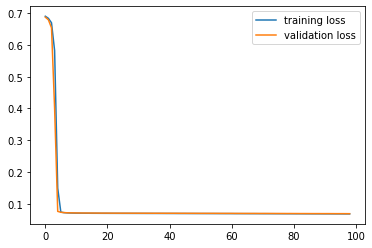

In [86]:
plt.plot(trn_losses, label='training loss')
plt.plot(val_losses,label='validation loss')
plt.legend()

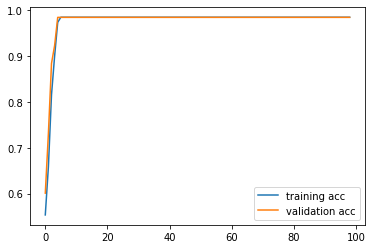

In [87]:
plt.plot(trn_acc, label='training acc')
plt.plot(val_acc,label='validation acc')
plt.legend()